In [6]:
import numpy as np

np.random.seed(42)  # Đảm bảo tái lập kết quả

mean_x = np.zeros(3)  # Vector trung bình của x
C_x = np.array([[2, 0.5, 0], [0.5, 1, 0], [0, 0, 0.5]])  

A = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  

x_samples = np.random.multivariate_normal(mean_x, C_x, size=1000) 
y_samples = x_samples @ A.T  # Tính y = Ax

mean_y = np.mean(y_samples, axis=0)
print("Trung bình của y (E{y}):", mean_y)

C_y_experimental = np.cov(y_samples, rowvar=False)

C_y_theoretical = A @ C_x @ A.T

print("\nMa trận hiệp phương sai thực nghiệm (C_y):\n", C_y_experimental)
print("\nMa trận hiệp phương sai lý thuyết (C_y):\n", C_y_theoretical)

eigenvalues, _ = np.linalg.eigh(C_y_theoretical)  
print("\nCác giá trị riêng (λ):", eigenvalues)


Trung bình của y (E{y}): [-0.07347135 -0.03618539  0.03320576]

Ma trận hiệp phương sai thực nghiệm (C_y):
 [[1.84849743 0.49231818 0.01140657]
 [0.49231818 1.03562071 0.02818606]
 [0.01140657 0.02818606 0.48129696]]

Ma trận hiệp phương sai lý thuyết (C_y):
 [[2.  0.5 0. ]
 [0.5 1.  0. ]
 [0.  0.  0.5]]

Các giá trị riêng (λ): [0.5        0.79289322 2.20710678]


In [10]:
import numpy as np
from collections import Counter
import heapq
class Node:
    def __init__(self, symbol, freq):
        self.symbol = symbol
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(frequencies):
    heap = [Node(symbol, freq) for symbol, freq in frequencies.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        node1 = heapq.heappop(heap)
        node2 = heapq.heappop(heap)
        merged = Node(None, node1.freq + node2.freq)
        merged.left = node1
        merged.right = node2
        heapq.heappush(heap, merged)

    return heap[0]

def build_huffman_codes(tree, prefix="", codebook={}):
    if tree is not None:
        if tree.symbol is not None:
            codebook[tree.symbol] = prefix
        build_huffman_codes(tree.left, prefix + "0", codebook)
        build_huffman_codes(tree.right, prefix + "1", codebook)
    return codebook
I = np.array([
    [1, 1, 0, 1, 1, 0, 1, 0],
    [1, 0, 0, 1, 1, 1, 0, 1],
    [1, 1, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 0],
    [1, 0, 0, 0, 1, 0, 1, 1],
    [0, 0, 1, 1, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 1, 0, 1]])
blocks = []
rows, cols = I.shape
for i in range(0, rows, 2):
    for j in range(0, cols, 2):
        block = tuple(I[i:i+2, j:j+2].flatten())
        blocks.append(block)

frequencies = Counter(blocks)

huffman_tree = build_huffman_tree(frequencies)

huffman_codes = build_huffman_codes(huffman_tree)

encoded_image = "".join([huffman_codes[block] for block in blocks])

print("Tần suất của các khối:")
for block, freq in frequencies.items():
    print(f"{block}: {freq}")

print("\nBảng mã Huffman:")
for symbol, code in huffman_codes.items():
    print(f"{symbol}: {code}")

print("\nChuỗi mã hóa Huffman:")
print(encoded_image)


Tần suất của các khối:
(1, 1, 1, 0): 2
(0, 1, 0, 1): 2
(1, 0, 1, 1): 2
(1, 0, 0, 1): 3
(1, 1, 0, 1): 1
(0, 0, 1, 1): 1
(1, 1, 0, 0): 1
(1, 0, 1, 0): 1
(0, 0, 0, 1): 2
(1, 1, 1, 1): 1

Bảng mã Huffman:
(1, 0, 0, 1): 00
(1, 1, 1, 1): 0100
(1, 1, 0, 1): 0101
(0, 0, 0, 1): 011
(0, 1, 0, 1): 100
(1, 1, 1, 0): 101
(1, 1, 0, 0): 1100
(0, 0, 1, 1): 1101
(1, 0, 1, 0): 1110
(1, 0, 1, 1): 1111

Chuỗi mã hóa Huffman:
1011001111000101001001101101110011101111011010001100


In [ ]:
def run_length_encoding(data):
    encoded = ""
    count = 1
    
    for i in range(1, len(data)):
        if data[i] == data[i - 1]:
            count += 1
        else:
            encoded += f"{data[i - 1]}{count}"
            count = 1
    
    # Xử lý ký tự cuối cùng
    if data:
        encoded += f"{data[-1]}{count}"
    return encoded

# Nhập dữ liệu
print("Input:")
data = input().strip()

# Xuất kết quả
if data:
    result = run_length_encoding(data)
    print("Output:")
    print(result)
else:
    print("Output:")
    print("")  # Xử lý chuỗi rỗng


In [11]:
def run_length_encoding(data):
    encoded = ""
    count = 1
    
    for i in range(1, len(data)):
        if data[i] == data[i - 1]:
            count += 1
        else:
            encoded += f"{data[i - 1]}{count}"
            count = 1
    
    # Thêm ký tự cuối cùng
    encoded += f"{data[-1]}{count}"
    return encoded


# Input
case = 1
data = "AAAABBBCCDAA"

# Output
result = run_length_encoding(data)
print(result)


A4B3C2D1A2


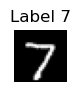

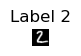

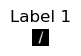

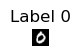

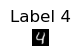

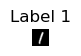

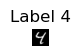

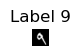

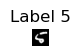

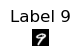

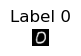

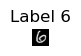

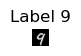

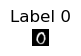

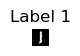

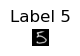

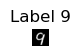

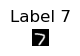

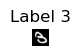

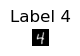

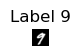

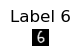

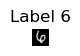

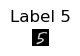

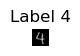

<Figure size 640x480 with 0 Axes>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import gzip, os, sys
import numpy as np
from scipy.stats import multivariate_normal

# Function to load MNIST images from your machine
def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 784)  # Flatten images to vectors of size 784 (28x28)
    return data

# Function to load MNIST labels from your machine
def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

# Load the training set
train_data = load_mnist_images(r'C:\Users\ngtrd\Downloads\train-images-idx3-ubyte.gz')  # Change to your local path
train_labels = load_mnist_labels(r'C:\Users\ngtrd\Downloads\train-labels-idx1-ubyte.gz')  # Change to your local path

# Load the testing set
test_data = load_mnist_images(r'C:\Users\ngtrd\Downloads\t10k-images-idx3-ubyte.gz')  # Change to your local path
test_labels = load_mnist_labels(r'C:\Users\ngtrd\Downloads\t10k-labels-idx1-ubyte.gz')  # Change to your local path

# Define a function that displays a digit given its vector representation
def show_digit(x, label):
    plt.axis('off')
    plt.imshow(x.reshape((28, 28)), cmap=plt.cm.gray)
    plt.title('Label ' + str(label))

# Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def vis_image(index, dataset="train"):
    if dataset == "train":
        label = train_labels[index]
        show_digit(train_data[index], label)
    else:
        label = test_labels[index]
        show_digit(test_data[index], label)
    plt.show()

# Display 25 images from the test set in 1 row (1x25)
plt.figure(figsize=(20, 4))  # Adjust the figure size to accommodate 25 images in one row
for i in range(25):
    plt.subplot(1, 25, i + 1)  # 1 row and 25 columns
    vis_image(i, dataset="test")
plt.tight_layout()
plt.show()
